* 設定
    * 乳がん検査データを利用しロジスティック回帰モデルを作成
    * 主成分を利用し2次元空間上に次元圧縮
* 課題
    * 32次元のデータを2次元上に次元圧縮した際に、うまく判別できるかを確認

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
cancer_df = pd.read_csv('./data/cancer.csv', encoding='utf-8')

## データの確認

In [7]:
print(cancer_df.shape)
display(cancer_df.head())

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 前処理

In [8]:
cancer_df = cancer_df.drop('Unnamed: 32', axis=1)  # 不要列を削除

In [9]:
print(cancer_df.shape)

(569, 32)


* diagnosis: 診断結果 (良性がB / 悪性がM)
* 説明変数は3列以降、目的変数を2列目としロジスティック回帰で分類

In [10]:
# 診断結果を {良性: 0, 悪性: 1} に変換
cancer_df['diagnosis'] = cancer_df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [11]:
# 目的変数の抽出
y = cancer_df['diagnosis']

In [12]:
# 説明変数の抽出
X = cancer_df.drop('diagnosis', axis=1)

In [13]:
display(X.head(3))

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## 学習

In [14]:
# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# ロジスティック回帰で学習
model_lr = LogisticRegressionCV(cv=10, random_state=0)

In [17]:
model_lr.fit(X_train_scaled, y_train)

e:\venv\datascience\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
e:\venv\datascience\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  

LogisticRegressionCV(cv=10, random_state=0)

## モデルの検証

In [18]:
# スコアの確認
score_train = model_lr.score(X_train_scaled, y_train)
score_test = model_lr.score(X_test_scaled, y_test)

print(f'Train score: {score_train:.3f}')
print(f'Test score: {score_test:.3f}')

Train score: 0.988
Test score: 0.965


In [19]:
# テストデータから予測
y_pred = model_lr.predict(X_test_scaled)

In [21]:
# 混同行列
confusion_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(f'Confustion Matrix:\n{confusion_mat}')

Confustion Matrix:
[[89  1]
 [ 4 49]]


## 主成分分析

In [36]:
pca = PCA(n_components=30)
pca.fit(X_train_scaled)

PCA(n_components=30)

In [37]:
# 寄与率
ratio = pca.explained_variance_ratio_
print(ratio)
print(len(ratio))

[4.19356639e-01 1.89758038e-01 9.28752931e-02 6.47347758e-02
 5.53789199e-02 3.92849216e-02 3.30951990e-02 1.98419580e-02
 1.44186823e-02 1.30499234e-02 1.12985749e-02 1.00544239e-02
 8.63128818e-03 7.60047785e-03 4.85373978e-03 3.03015543e-03
 2.56268889e-03 1.92464885e-03 1.59237279e-03 1.44838730e-03
 1.02528778e-03 1.01315561e-03 8.26568340e-04 6.97877320e-04
 5.81699935e-04 5.28997538e-04 2.51858423e-04 2.09625384e-04
 4.54459005e-05 2.48265533e-05]
30


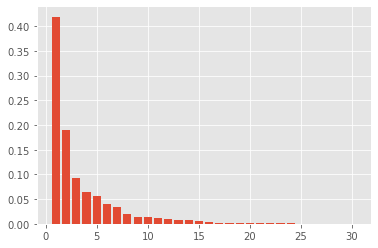

In [38]:
plt.bar([n for n in range(1, len(ratio) + 1)], ratio)
plt.show()

## 次元圧縮

In [40]:
# 2次元に次元圧縮する
pca2 = PCA(n_components=2)
X_train_pca2 = pca2.fit_transform(X_train_scaled)

In [41]:
print(X_train_pca2.shape)

(426, 2)


In [43]:
# 寄与率 (リストの要素数が2であることを確認)
ratio2 = pca2.explained_variance_ratio_
print(ratio2)
print(len(ratio2))

[0.41935664 0.18975804]
2


In [45]:
tmp_df = pd.DataFrame(X_train_pca2)
display(tmp_df.head())

,0,1
0,-2.863510,-0.280603
1,-3.267414,1.073180
2,3.752043,-3.397107
3,-3.493976,-2.684386
4,-0.747713,-2.469012


In [47]:
tmp_df['Outcome'] = y_train.values
benign = tmp_df[tmp_df['Outcome'] == 0]  # 0が両性
malignant = tmp_df[tmp_df['Outcome'] == 1]  # 1が悪性

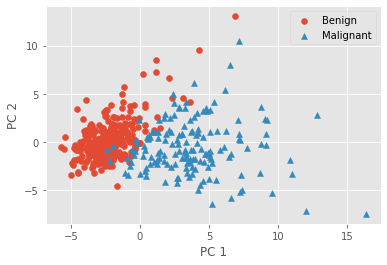

In [49]:
plt.scatter(x=benign[0], y=benign[1], marker='o', label='Benign') # 良性は○でマーク
plt.scatter(x=malignant[0], y=malignant[1], marker='^', label='Malignant') # 悪性は△でマーク
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸
plt.legend()
plt.show()